### 인간관계 네트워크 가시화

In [2]:
import pandas as pd
df_links = pd.read_csv("links.csv")
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


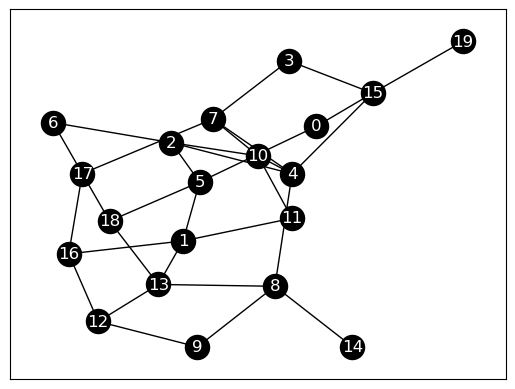

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# 객체 설정
G = nx.Graph()

#노드 설정 : 노드 이름에 숫자만 0~19 이름붙임
for i in range(1, len(df_links.index)+1): #df_links의 첫열은 unnamed이므로 제외
    G.add_node(df_links.columns[i].strip('Node'))#Node를 빼겠다
#엣지 설정 : 노드 간(i, j간) 깂이 1인 경우만 엣지로 연결
for i in range(len(df_links.index)):
    for j in range(len(df_links.index)):
        node_name = 'Node' + str(j)
        
        if df_links[node_name].iloc[i] == 1:
            G.add_edge(str(i), str(j))
            
#그리기
nx.draw_networkx(G, node_color = 'k', edge_color = 'k', font_color = 'w')
plt.show()
    


### 입소문에 의한 전파 시뮬 시각화 random함수


In [9]:
# 입소문 전파 확률 10%를 np.random.rand()
def determine_link(percent): # percent는 우리가 임의로 0.1(10퍼)로 넣을 것임
    rand_val = np.random.rand()
    if rand_val <= percent:
        return 1
    else: return 0
# rand_val은 np.random.rand()가 랜덤하게 뽑은 0~1사이 난수 random.rand() = random.random()


In [10]:
# 입소문 시뮬레이션
def simulate_percolation(num, list_active, percent_percolation):# num:사람수(20명), list_active:각 사람의 입소문이 전달되었나(!,0), percent_percolation : 앞에서 determine_link함수에 넣는 확률 (0.1)
    
    for i in range(num):
        if list_active[i] == 1: #어떤 사람 i의 입소문이 전달된 경우
            for j in range(num): #i랑 연결된 다른 j에 대해서..
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i] == 1: #i 와 j가 연결 되어있다면
                    if determine_link(percent_percolation) == 1:# 그렇다면 랜덤 확률이 10%보다 작나
                        list_active[j] = 1 #이것도 맞다면 j 너는 입소문이 전달 되었다 1로 두겠다
    return list_active
    

In [12]:
percent_percolation = 0.1
T_NUM = 36
NUM = len(df_links.index) # 20개 노드 (0~19)
list_active = np.zeros(NUM) # 모두 0으로 초기화
list_active[0] = 1# 첫번째 노드에만 1을 넣어줌, 입소문을 일으키면 36개월 뒤엔 어떻게 될까
list_active
#전파 확률 = 0.1%
# 입소문 개월수(T_NUM) = 36개
# 사람수(NUM) = 20

list_ts = []
for t in range(T_NUM): #df_links 데이터로 시뮬레이션을 36번 해봄
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_ts.append(list_active.copy())
list_ts

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 

In [15]:
# 컬러링 함수 list_active값이 들어오면 list_color반환
def active_node_coloring(t, list_active):# t에는 몇번째 list_ts값을 반환할지 넣는다 개월수
    list_color = []
    for i in range(len(list_ts[t])):
        if list_ts[t][i] == 1:
            list_color.append('r')
        else:
            list_color.append('k')
    return list_color
# t에 12를 넣는다면 list_ts의 12번째 리스트가 나오고 0~12 즉13개월째 입소문 현황을 시각화


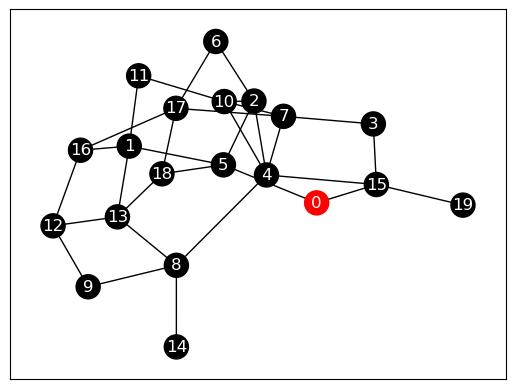

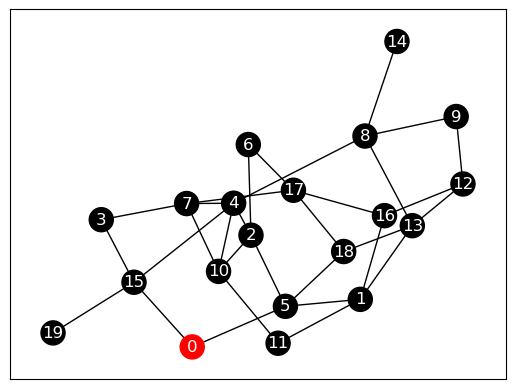

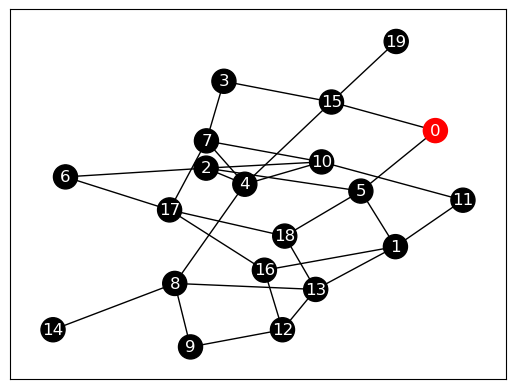

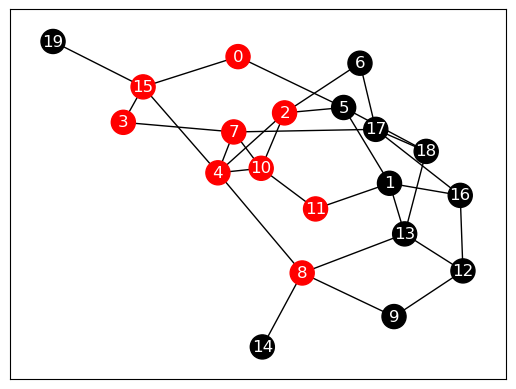

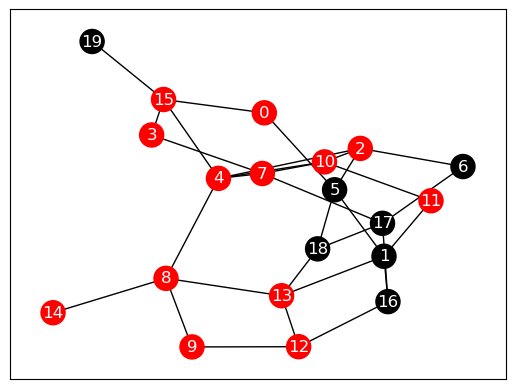

In [16]:
# 1개월, 6개월, 12개월, 24개월, 36개월일 때 전파 모습 비교
t_list = [0,5,11,23,25]
for t in t_list:
    nx.draw_networkx(G, font_color = 'w', node_color = active_node_coloring(t, list_ts))
    plt.show()